## Can Stablecoins by a critical sink for US Treasuries?

Author: [paulx.eth](https://warpcast.com/paulx.eth) on Farcaster | [paulapivat](https://twitter.com/paulapivat) on X

### Background

The total current stablecoin market cap is approximately [$147 billion](https://defillama.com/stablecoins). Different stablecoin models have been tried over the years, with fiat, crypto and algorithmic backing as the broad categories. The collapse of [Terra Luna](https://www.nber.org/papers/w31160) highlighted the importance of collateral backing, compelling the industry to adopt safer collateral assets, namely US Treasury Debt for dollar-pegged stablecoins.

**But how much of the top stablecoins are backed by US Treasuries?**

We'll first consult [rwa.xyz](https://app.rwa.xyz/stablecoins) stablecoin directory which lists different attributes:

<img src="./png/stablecoin_underlying.png" style="width: 75%;"/>

The screencap above shows stablecoin name, ticker, market cap, price, pegged currency and underlying assets, among other things. At the time of this writing, 58 stablecoins were listed, but only 15 had "US Treasury Debt" listed as one of several underlying assets ([source](https://app.rwa.xyz/stablecoins)).

However, to get more exact figures, we had to go directly to **attestation reports** or proof of reserves by independent accountants. At the moment, there is little consensus on stablecoin reserve reporting. For example, most stablecoins have monthly reports, while some are quarterly or yearly. Projects like Frax Finance, have a [real-time balance sheet](https://facts.frax.finance/frax/balance-sheet) available. 

Here's a breakdown of different reporting cadence by ticker:

```
Yearly:         DAI*
Quarterly:      USDT
Monthly:        USDC, DFUSD, PYUSD, USDP, USDM, GUSD, ZUSD 
Daily:          USDV (STBT)
Real-time:      FRAX
```

*DAI is arguably [real-time](https://daistats.com/#/collateral), but it lists custodians (ie, BlockTower, Centrifuge) instead of labeling reserve assets, so we refer to the [report from Steakhouse Financial](https://www.steakhouse.financial/projects/makerdao-financial-report-2023) instead. 

Nevertheless, information of how much of the collateral backing for the stablecoins listed above are held in US Treasury _today_ is available (as of Jan 31, 2024), let's take a look:


In [ ]:
!pip install pandas
import pandas as pd

stablecoin_tbills_path = './data/stablecoin_tbills.csv'

stablecoin_tbills_df = pd.read_csv(stablecoin_tbills_path)

The below table shows a list of stablecoins and their current reserve of US Treasury Bills backing their supply of circulating stablecoins. We can sum `tbills_amount_current` to confirm the amount of stablecoin reserves held in US Treasuries today.

This comes out to **$82.5 billion** ($82,538,358,331) in US Treasuries or, roughly **65%** of the value of major stable coins in circulation. Moreover, it contextually important to see how we got here, to be able to make some rough guesstimate on where we’ll be in 10 years time. 

**note**: Projects included in the above calculation have attestations provided via independent accountants showing end of month balances for U.S Treasury Bills (including short-dated treasuries, overnight repurchase agreements). 

In [2]:
current_tbills_filtered = (
    stablecoin_tbills_df[['name', 'ticker', 'tbills_amount_current', 'date_current_attestation']]
    .loc[stablecoin_tbills_df['name'].notna()]
)

current_tbills_filtered

,name,ticker,tbills_amount_current,date_current_attestation
0,Tether USD,USDT,"63,086,013,400",2023-12-31
1,Circle USD Coin,USDC,"15,342,000,000",2024-01-31
2,MakerDAO Dai,DAI,"1,680,000,000",2023-12-31
3,First Digital Labs USD,FDUSD,"1,531,578,778",2024-01-31
4,Frax Finance,FRAX,"1,940,686",NaN
5,Tether Euro,EURT,"283,045,376",NaN
6,Paypal USD (Paxos),PYUSD,"303,541,803",2024-01-31
7,Pax Dollar (Paxos),USDP,"124,525,000",2024-01-31
8,Mountain Protocol USD,USDM,"151,967,269",2024-02-29
9,Gemini Dollar,GUSD,"10,213,348",2024-01-31


In [3]:
formatted_total = "${:,.0f}".format(
    current_tbills_filtered['tbills_amount_current']
    .replace('[\,]', '', regex=True)
    .astype(float)
    .sum()
)

formatted_total


'$82,538,358,331'

### Methodology

The [stablecoin directory on rwa.xyz](https://app.rwa.xyz/stablecoins) provided a starting point for identifying which stablecoins could potentially have U.S. Treasury Bills as an underlying asset. From there, we combed through independent attestations reports from various accounting firms. Early reports only mentioned how much of a stablecoin’s circulating supply was backed by “the U.S. dollar”. 

Only over time reports provided more nuance in delineating U.S. Treasury Bills (with maturity dates, Cusip numbers), overnight reverse repurchase agreements etc. 

For simplicity, we include a stablecoin's "Total U.S. Treasury Bill" at time of attestation into the dataset. 

Moreover, we try to document earliest mention of "U.S. Treasury" in various attestation reports. Below we get a sense for how reporting has evolved over the years. **Pax Dollar (Paxos)** was the first stablecoin to explicitly label "US Treasury" in its attestation reports, followed by Gemini Dollar. A couple years later, USDC and UDST followed suit. In 2023, it had become standard practice. 

In [4]:
earliest_tbills_filtered = (
    stablecoin_tbills_df[['name', 'ticker', 'date_earliest_attestation', 'tbills_amount_earliest', 'attestation_interval']]
    .loc[stablecoin_tbills_df['name'].notna()]
)

earliest_tbills_filtered

,name,ticker,date_earliest_attestation,tbills_amount_earliest,attestation_interval
0,Tether USD,USDT,2021-07-30,"15,279,528,705",quarterly
1,Circle USD Coin,USDC,2021-05-28,"2,700,000,000",monthly
2,MakerDAO Dai,DAI,2022-12-31,"640,000,000",yearly
3,First Digital Labs USD,FDUSD,2023-11-30,"857,505,738",monthly
4,Frax Finance,FRAX,NaN,NaN,real_time
5,Tether Euro,EURT,NaN,NaN,NaN
6,Paypal USD (Paxos),PYUSD,2023-08-31,"43,860,001",monthly
7,Pax Dollar (Paxos),USDP,2018-12-31,"142,326,370",monthly
8,Mountain Protocol USD,USDM,2023-09-30,"2,284,325",monthly
9,Gemini Dollar,GUSD,2019-05-31,"21,526,280",monthly


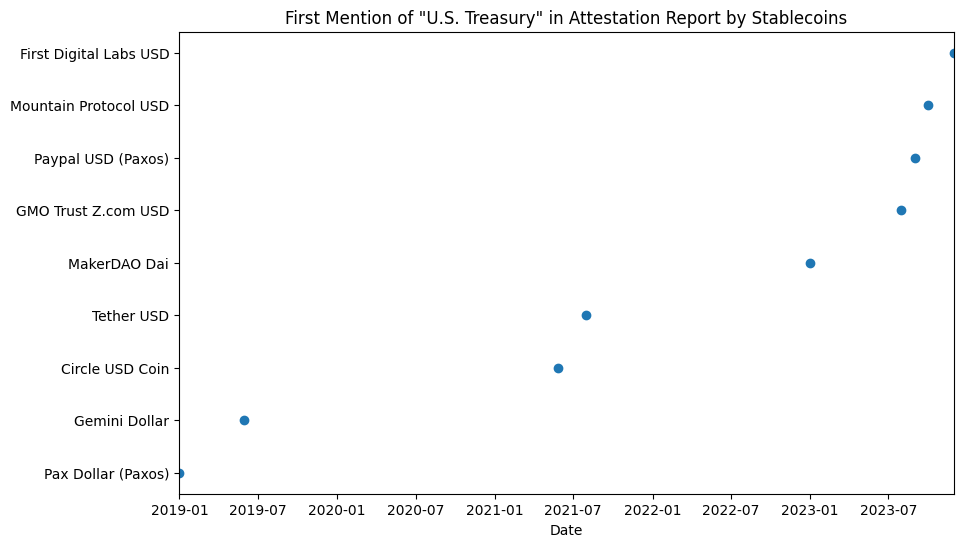

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime



earliest_df = earliest_tbills_filtered[['date_earliest_attestation', 'name']]

earliest_df = earliest_df.copy()

earliest_df['date_earliest_attestation'] = pd.to_datetime(earliest_df['date_earliest_attestation'])
earliest_df.sort_values('date_earliest_attestation', inplace=True)

earliest_df['date_earliest_attestation'] = pd.to_datetime(earliest_df['date_earliest_attestation'])

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(earliest_df['date_earliest_attestation'], earliest_df['name'])

# Setting the date range on the x-axis
plt.xlim([datetime(2018, 12, 31), datetime(2023, 11, 30)])

# Formatting
plt.xlabel('Date')
plt.title('First Mention of "U.S. Treasury" in Attestation Report by Stablecoins')

# Show plot
plt.show()

In [6]:
tbills_growth = (
    stablecoin_tbills_df[['name', 'ticker', 'market_cap_current', 'market_cap_earliest', 'tbills_amount_current', 'tbills_amount_earliest']]
    .loc[stablecoin_tbills_df['tbills_amount_earliest'].notna()]
)

tbills_growth

,name,ticker,market_cap_current,market_cap_earliest,tbills_amount_current,tbills_amount_earliest
0,Tether USD,USDT,"91,572,956,801","62,610,829,196","63,086,013,400","15,279,528,705"
1,Circle USD Coin,USDC,"26,739,379,540","22,176,182,251","15,342,000,000","2,700,000,000"
2,MakerDAO Dai,DAI,"5,190,000,000","5,062,000,000","1,680,000,000","640,000,000"
3,First Digital Labs USD,FDUSD,"2,578,169,834","965,652,971","1,531,578,778","857,505,738"
6,Paypal USD (Paxos),PYUSD,"301,175,241","44,376,440","303,541,803","43,860,001"
7,Pax Dollar (Paxos),USDP,"353,101,046","142,326,370","124,525,000","142,326,370"
8,Mountain Protocol USD,USDM,"152,286,933","2,468,314","151,967,269","2,284,325"
9,Gemini Dollar,GUSD,"37,478,807","21,526,280","10,213,348","21,526,280"
10,GMO Trust Z.com USD,ZUSD,"19,033,372","16,283,065","17,901,832","1,033,658"


### Rise of T-bills in reserve assets

The pie charts below show how the ratio of t-bills in reserve to stablecoin market cap has changed from earlier years (2018 - 2023) to present time (2024).

The proportion of stablecoin market cap backed by the U.S. Treasury has markedly increased. Initially, approximately 20% of the stablecoin market cap was backed by US Treasury assets ($19 billion of $91 billion).

Presently, this backing has risen to approximately 64% ($82 billion of $128 billion).


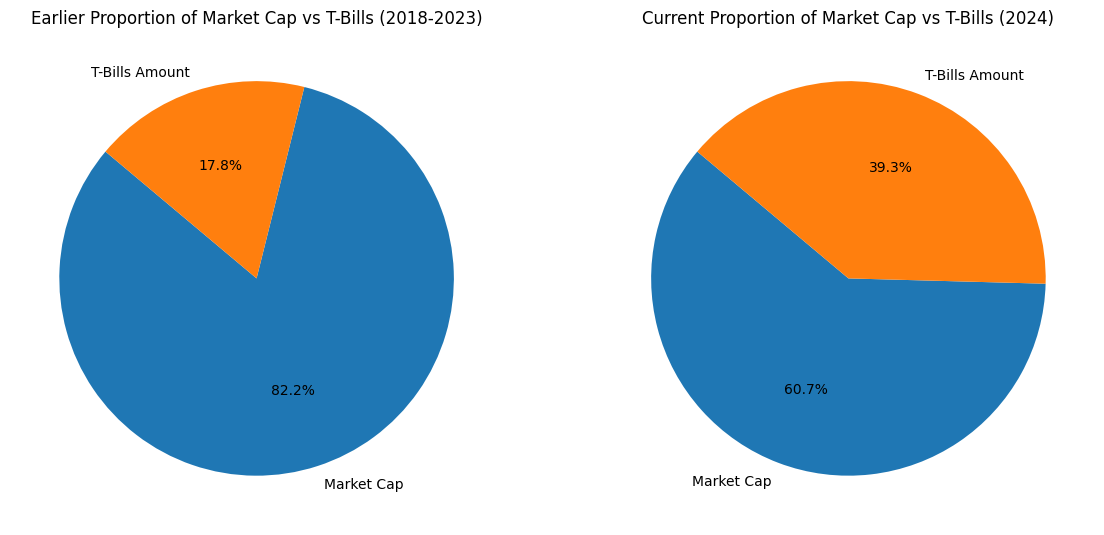

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

def convert_to_float(df, columns):
    for col in columns:
        df[col] = df[col].str.replace(',', '').astype(float)
    return df

columns_to_convert = ['market_cap_current', 'market_cap_earliest', 'tbills_amount_current', 'tbills_amount_earliest']
tbills_growth = convert_to_float(tbills_growth, columns_to_convert)

# Calculating total sums for current and earliest market caps and tbills amounts
total_market_cap_current = tbills_growth['market_cap_current'].sum()
total_market_cap_earliest = tbills_growth['market_cap_earliest'].sum()
total_tbills_current = tbills_growth['tbills_amount_current'].sum()
total_tbills_earliest = tbills_growth['tbills_amount_earliest'].sum()

# Data for the pie charts
data_earliest = [total_market_cap_earliest, total_tbills_earliest]
data_current = [total_market_cap_current, total_tbills_current]
labels = ['Market Cap', 'T-Bills Amount']

# Creating the pie charts
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Earliest data pie chart
axes[0].pie(data_earliest, labels=labels, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Earlier Proportion of Market Cap vs T-Bills (2018-2023)')

# Current data pie chart
axes[1].pie(data_current, labels=labels, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Current Proportion of Market Cap vs T-Bills (2024)')

plt.show()

### Stablecoin and T-Bill reserve growth

T-bills in reserves have gone up from approx $19bn to $82bn (4x) while market cap has increased $91bn to $126bn (in our current subset of stablecoin projects, not exhaustive of all projects). 

This shift indicates a move towards greater security and reliability within the stablecoin ecosystem. By increasing the proportion of backing with highly liquid and traditionally stable assets like US Treasury securities, the stability and trust in stablecoins will likely improve.

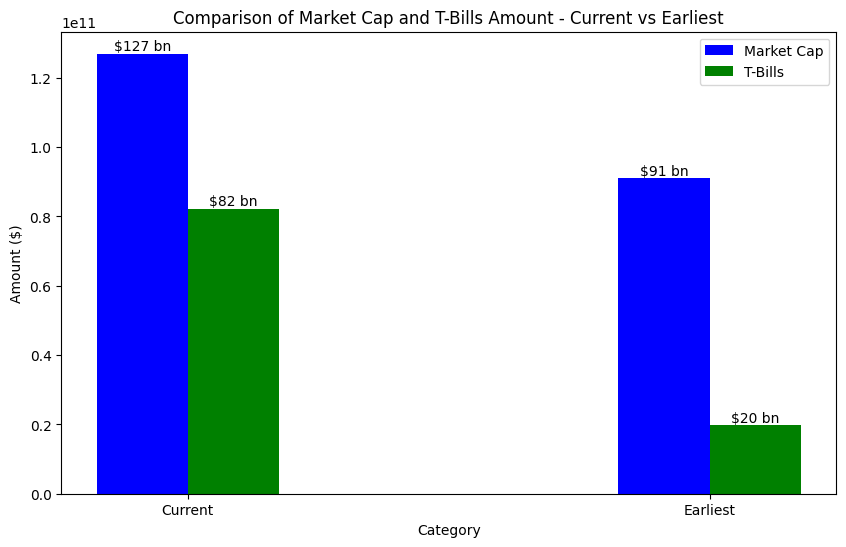

In [8]:
import matplotlib.pyplot as plt

# Function to format values in billions
def format_billion(value):
    return f"${value / 1e9:.0f} bn"

# Creating the bar charts
plt.figure(figsize=(10, 6))

# Width of the bars
bar_width = 0.35

# Positions of the bars
bar1 = [1, 3]
bar2 = [x + bar_width for x in bar1]

# Plotting market cap and tbills for current and earliest
plt.bar(bar1, [total_market_cap_current, total_market_cap_earliest], color='blue', width=bar_width, label='Market Cap')
plt.bar(bar2, [total_tbills_current, total_tbills_earliest], color='green', width=bar_width, label='T-Bills')

# Adding labels
plt.text(bar1[0], total_market_cap_current, format_billion(total_market_cap_current), ha='center', va='bottom')
plt.text(bar1[1], total_market_cap_earliest, format_billion(total_market_cap_earliest), ha='center', va='bottom')
plt.text(bar2[0], total_tbills_current, format_billion(total_tbills_current), ha='center', va='bottom')
plt.text(bar2[1], total_tbills_earliest, format_billion(total_tbills_earliest), ha='center', va='bottom')

# Formatting
plt.xlabel('Category')
plt.ylabel('Amount ($)')
plt.title('Comparison of Market Cap and T-Bills Amount - Current vs Earliest')
plt.xticks([r + bar_width/2 for r in bar1], ['Current', 'Earliest'])
plt.legend()

# Show plot
plt.show()

In [26]:

def format_and_display_sums(dataframe, columns):
    formatted_totals = {}
    for col in columns:
        sum_value = dataframe[col].replace('[\,]', '', regex=True).astype(float).sum()
        formatted_totals[col] = "${:,.0f}".format(sum_value)
    return formatted_totals

# Columns to be summed and formatted
columns_to_sum = ['market_cap_current', 'market_cap_earliest', 'tbills_amount_current', 'tbills_amount_earliest']

# formatted sum from tbills_growth dataframe
formatted_sums = format_and_display_sums(tbills_growth, columns_to_sum)

# Display the formatted values
for name, value in formatted_sums.items():
    print(f"{name}: {value}")

market_cap_current: $126,943,581,574
market_cap_earliest: $91,041,644,887
tbills_amount_current: $82,247,741,430
tbills_amount_earliest: $19,688,065,077


### Stablecoin market cap growth

To show _stablecoin_ growth, we'll use numbers from [DeFi Llama](https://defillama.com/stablecoins), which has a dataset that shows how marketcap for each stablecoin coin has changed on a _daily_ basis from `2021-03-31` to `2024-03-13`, this will make it easier to visualize growth trends.

We'll show the growth trend for the projects we covered above identifying U.S. Treasury backing. 

In [11]:
defillama_stablecoins_path = './data/defillama_stablecoins.csv'
defillama_df = pd.read_csv(defillama_stablecoins_path)

subset_defillama_df = (
    defillama_df
    .loc[:, ['Timestamp', 'Date'] + 
         [ticker for ticker in earliest_tbills_filtered['ticker'].unique() if ticker in defillama_df.columns]]
)

subset_defillama_df

,Timestamp,Date,USDT,USDC,DAI,FDUSD,FRAX,EURT,PYUSD,USDP,USDM,GUSD,ZUSD,USDV
0,1617148800,2021-03-31,4.072640e+10,1.091108e+10,3.015418e+09,NaN,1.112374e+08,NaN,NaN,9.553460e+08,NaN,1.238934e+08,604104.24,NaN
1,1617235200,2021-04-01,4.082866e+10,1.081464e+10,3.009058e+09,NaN,1.125756e+08,NaN,NaN,9.820290e+08,NaN,1.255851e+08,603931.29,NaN
2,1617321600,2021-04-02,4.086523e+10,1.087159e+10,2.965694e+09,NaN,1.122272e+08,NaN,NaN,9.721631e+08,NaN,1.235295e+08,605776.95,NaN
3,1617408000,2021-04-03,4.181313e+10,1.090838e+10,3.041816e+09,NaN,1.170263e+08,NaN,NaN,9.802246e+08,NaN,1.231078e+08,607096.14,NaN
4,1617494400,2021-04-04,4.247584e+10,1.076522e+10,3.059450e+09,NaN,1.129356e+08,NaN,NaN,9.822631e+08,NaN,1.229125e+08,605427.76,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,1709942400,2024-03-09,1.017896e+11,2.843871e+10,4.341966e+09,2.918264e+09,6.452420e+08,49470515.97,1.914719e+08,2.026005e+08,1.530383e+08,1.481287e+08,18923586.56,24804030.53
1075,1710028800,2024-03-10,1.020164e+11,2.847396e+10,4.340023e+09,2.935756e+09,6.463552e+08,49515901.77,1.910957e+08,2.027759e+08,1.530586e+08,1.484447e+08,18923585.56,24729164.57
1076,1710115200,2024-03-11,1.020123e+11,2.854978e+10,4.509826e+09,2.918264e+09,6.461649e+08,49515901.77,1.929016e+08,2.027252e+08,1.518311e+08,1.482945e+08,18923586.56,24745406.33
1077,1710201600,2024-03-12,1.023671e+11,2.893349e+10,4.504067e+09,2.862440e+09,6.465994e+08,49515901.77,1.906501e+08,2.027968e+08,1.526418e+08,1.481038e+08,18923567.56,24883664.96


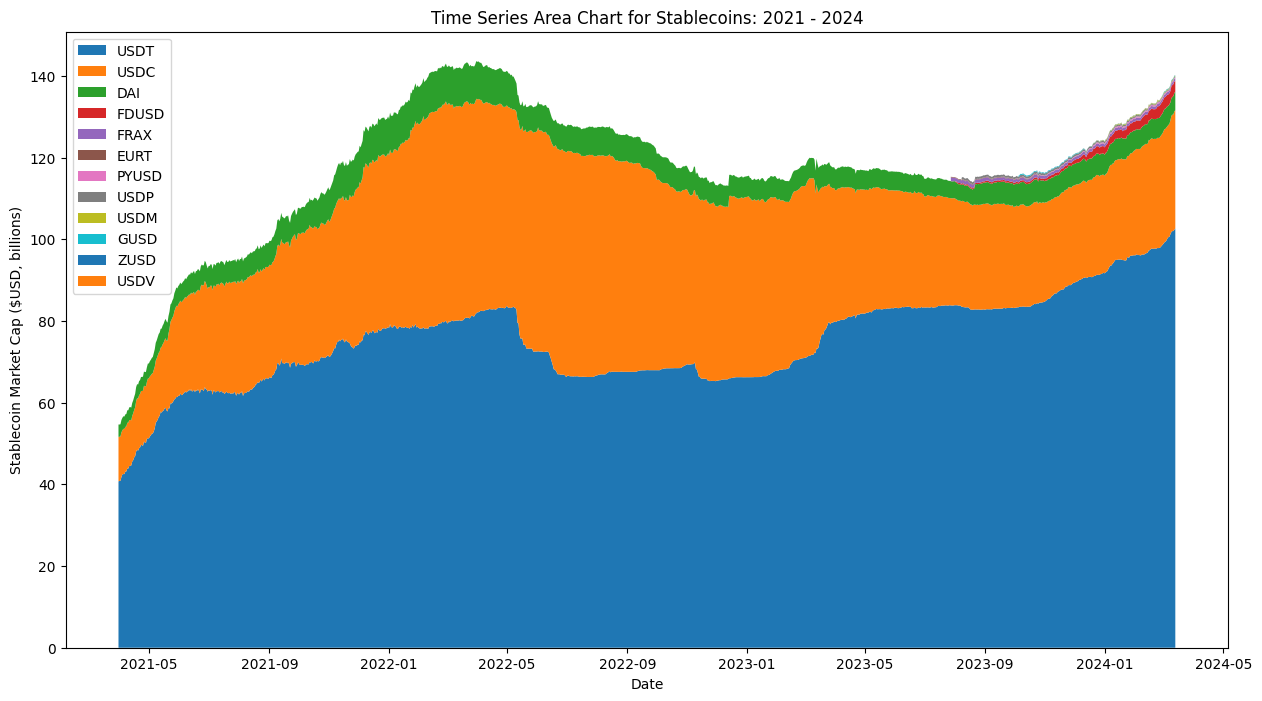

In [17]:
import matplotlib.pyplot as plt

# set 'Date' as index
subset_defillama_df.reset_index(inplace=True)
subset_defillama_df['Date'] = pd.to_datetime(subset_defillama_df['Date'])
subset_defillama_df.set_index('Date', inplace=True)

# Plotting
plt.figure(figsize=(15, 8))
# Here, subset_defillama_df.columns should only contain the ticker symbols
plt.stackplot(subset_defillama_df.index, 
              [subset_defillama_df[ticker] / 1e9 for ticker in subset_defillama_df.columns if ticker != 'Timestamp'],
              labels=[ticker for ticker in subset_defillama_df.columns if ticker != 'Timestamp'])
plt.xlabel('Date')
plt.ylabel('Stablecoin Market Cap ($USD, billions)')
plt.title('Time Series Area Chart for Stablecoins: 2021 - 2024')
plt.legend(loc='upper left')
plt.show()

In [19]:
subset_defillama_df.columns

Index(['Timestamp', 'USDT', 'USDC', 'DAI', 'FDUSD', 'FRAX', 'EURT', 'PYUSD',
       'USDP', 'USDM', 'GUSD', 'ZUSD', 'USDV'],
      dtype='object')

In [22]:
import pandas as pd

# note: subset_defillama_df is already defined with 'Date' as index

# Sum the market caps for each date to get the total market cap for that date
total_market_caps = subset_defillama_df.drop('Timestamp', axis=1).sum(axis=1)

# Get the earliest and latest dates in the dataset
start_date = total_market_caps.index.min()
end_date = total_market_caps.index.max()

# Get the total market cap at the start and end dates
initial_total_market_cap = total_market_caps[start_date]
final_total_market_cap = total_market_caps[end_date]

# Calculate the number of years between the start and end dates
years = (end_date - start_date).days / 365.25

# Calculate the CAGR
cagr_total = ((final_total_market_cap / initial_total_market_cap) ** (1 / years)) - 1

cagr_total

0.36566991586645115

In [24]:
#  CAGR and current values
cagr_stablecoin = 0.365  
cagr_treasury = 0.27  
current_market_cap = 140e9  # $140 billion
current_treasury = 82e9     # $82 billion

# Projecting forward
years = 10  # 2024 to 2034


projections = {}
scenarios = ['worst', 'base', 'best']
multipliers = [0.75, 1, 1.25]  # Reduction, same, and increase in CAGR

for scenario, mult in zip(scenarios, multipliers):
    projected_market_cap = current_market_cap * ((1 + cagr_stablecoin * mult) ** years)
    projected_treasury = current_treasury * ((1 + cagr_treasury * mult) ** years)
    projections[scenario] = (projected_market_cap, projected_treasury)

# helper function to format in $USD with commas
def format_projections(projections):
    formatted_projections = {}
    for scenario, values in projections.items():
        formatted_market_cap = "${:,.0f}".format(values[0])
        formatted_treasury = "${:,.0f}".format(values[1])
        formatted_projections[scenario] = (formatted_market_cap, formatted_treasury)
    return formatted_projections

# Projections
formatted_projections = format_projections(projections)
formatted_projections

{'worst': ('$1,573,874,162,440', '$518,399,653,815'),
 'base': ('$3,143,797,392,799', '$895,057,759,520'),
 'best': ('$6,004,646,144,267', '$1,502,283,022,718')}

### Rough Growth Estimates

We have CAGR for Stablecoins marketcap growth at approx 36.5% from 2021-2024 and US Treasury Bill reserves growth at approx 27% from 2018-2024. Given a current Stablecoin market cap at $140 billion and t-bills in reserve at $82 billion, here are the scenarios for the next 10 years:


**Worst Case**
- Stablecoin Market Cap: $1,573,874,162,440       ($1.6 trillion)
- US Treasury Holdings: $518,399,653,815           ($518 billion)

**Base Case**
- Stablecoin Market Cap: $3,143,797,392,799       ($3.1 trillion)
- US Treasury Holdings: $895,057,759,520          ($895 billion)

**Best Case**
- Stablecoin Market Cap: $6,004,646,144,267       ($6.0 trillion)
- US Treasury Holdings: $1,502,283,022,718        ($1.5 trillion)

### Largest Foreign Holders of Treasuries

Here are the major foreign holders of U.S. treasury securities as of October 2023:

<img src="./png/tbills_state_holders.png" style="width: 60%;"/>

[source](https://www.statista.com/statistics/246420/major-foreign-holders-of-us-treasury-debt/)

In the **worst case** of US Treasury holdings growth by the stablecoin market, we have $518 billion in US Treasury bills held making seeing stablecoins jump from 20th place, ahead of Bermuda today, to 4th place ahead of where Luxembourg is today in 10 years time. 

The **base case** sees US treasury holdings grow to $895 billion, putting it _ahead_ of where China is today at $769 billion.

The **best case** sees stablecoins supplanting Japan, the _current_ number one holder of US Treasury bills. 

We see a high likelihood of stablecoins being a major sink for U.S. Treasury Bills in the next decade. However, are some additiona **x-factors** to consider.

#### Tokenized Treasuries

The process of having independent third party accounting firms provide attestations on a monthly or quarterly basis can be resource intensive, but is also inefficient. More importantly, there's a lost opportunity to have "off-chain" U.S. Treasuries be used in DeFi. In fact, we've seen a rise in "tokenized treasuries", here's a screen cap from [rwa.xyz](https://app.rwa.xyz/treasuries): 

<img src="./png/tokenized_treasuries.png" style="width: 40%;"/>


They are comparatively small in total value today, but is worth keeping an eye on as tokenization continues to go mainstream. We see this trend as a potential amplifier of stablecoins as a sink for U.S Treasuries. In fact, one stablecoins covered above, [Verified USD (USDV)](https://usdv.money/transparency) currently uses [STBT](https://stbt.matrixdock.com/) (short-term treasury bill token in its reserves).

#### Synthetic Dollars

[Ethena](https://www.ethena.fi/) has garnered a lot of attention, growing to [$1 billion in marketcap](https://defillama.com/stablecoin/ethena-usde) in a very short time. Underpinning this trend is a desire by some corners of crypto to develop stable values that do _not_ rely on the traditional financial system. Synthetic dollars are highly experimental and the jury is still out on whether they'll be around in a decade, but we see this as an alternative to stablecoins holding US Treasuries, instead favoring mnore crypto-native assets. 